In [1]:
import tensorflow as tf 
import numpy as np 

from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 

import warnings 
warnings.filterwarnings('ignore')

/home/umair/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/umair/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/umair/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/umair/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [2]:
tokenizer = Tokenizer() 

data = 'In the town of Athy one Jeremy lanigan \nBattered away till he hadnt had a pond. \nHis father died and made him rich'

corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(tokenizer.word_index) + 1
print("Word Index: ", word_index)
print("\nTotal unique words: ", total_words)

Word Index:  {'in': 1, 'the': 2, 'town': 3, 'of': 4, 'athy': 5, 'one': 6, 'jeremy': 7, 'lanigan': 8, 'battered': 9, 'away': 10, 'till': 11, 'he': 12, 'hadnt': 13, 'had': 14, 'a': 15, 'pond': 16, 'his': 17, 'father': 18, 'died': 19, 'and': 20, 'made': 21, 'him': 22, 'rich': 23}

Total unique words:  24


In [3]:
corpus

['in the town of athy one jeremy lanigan ',
 'battered away till he hadnt had a pond. ',
 'his father died and made him rich']

In [4]:
input_sequence = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0] # creates to word index for each word in a sentence
    for i in range(1, len(token_list)): 
        n_gram_sequence = token_list[:i+1] # creates n_grams sequence 
        input_sequence.append(n_gram_sequence)
        
print(input_sequence)

# pad the sequences 
max_sequence_len = len([max(x) for x in input_sequence])
input_sequences = np.array(pad_sequences(input_sequence, maxlen = max_sequence_len, padding = 'pre'))

# print(max_sequence_len)
print('\nMax sequence length: ', max_sequence_len)

# create predictors and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words) # categorizing the labels for the total number of words!

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [9, 10], [9, 10, 11], [9, 10, 11, 12], [9, 10, 11, 12, 13], [9, 10, 11, 12, 13, 14], [9, 10, 11, 12, 13, 14, 15], [9, 10, 11, 12, 13, 14, 15, 16], [17, 18], [17, 18, 19], [17, 18, 19, 20], [17, 18, 19, 20, 21], [17, 18, 19, 20, 21, 22], [17, 18, 19, 20, 21, 22, 23]]

Max sequence length:  20


In [5]:
# word indices for each token
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])

1
2
3
4
5
6
7


In [6]:
print(tokenizer.word_index)

{'in': 1, 'the': 2, 'town': 3, 'of': 4, 'athy': 5, 'one': 6, 'jeremy': 7, 'lanigan': 8, 'battered': 9, 'away': 10, 'till': 11, 'he': 12, 'hadnt': 13, 'had': 14, 'a': 15, 'pond': 16, 'his': 17, 'father': 18, 'died': 19, 'and': 20, 'made': 21, 'him': 22, 'rich': 23}


In [16]:
# EMB_DIM = total_words
num_epochs = 50

model = Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length = (max_sequence_len-1))
])
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 19, 64)            1536      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 24)                984       
Total params: 16,120
Trainable params: 16,120
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 1, verbose = 1)

Train on 20 samples
20/20 [==============================] - 1s 38ms/sample - loss: 0.0135 - accuracy: 1.0000


dict_keys(['loss', 'accuracy'])


Text(0, 0.5, 'Accuracy')

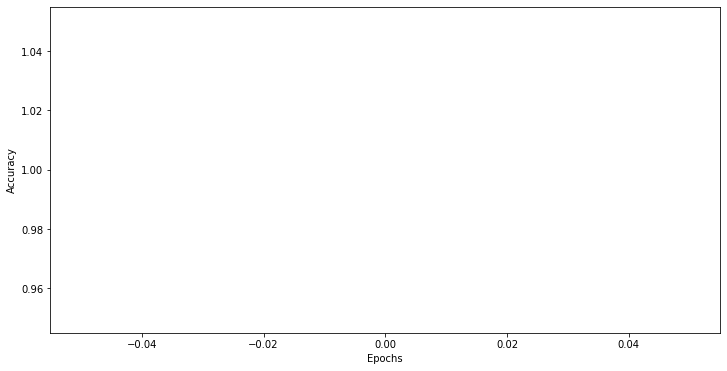

In [43]:
print(history.history.keys())
plt.figure(figsize = (12,6))
#plt.plot(history.history['acc'])
# plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [44]:
seed_text = 'In the town '
next_words = 100

for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = (max_sequence_len - 1), padding = 'pre')
    predicted = model.predict_classes(token_list, verbose = 0)
    output_word = ""
    for index, word in tokenizer.word_index.items():
        if index == predicted:
            output_word = word 
            break
        
    seed_text += " " + output_word
    
print(seed_text)

In the town                                                                                                     
